<a href="https://colab.research.google.com/github/santipop1/AdvancedIA/blob/main/SegundoBloque/Notebook4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
n=500


In [3]:
# Datos sinteticos
MedInc = np.random.lognormal(mean=2.5, sigma=0.35, size=n)
HouseAge = np.random.randint(1, 52, size=n)
Longitude = -124 + np.random.rand(n) * 10
Latitude = 32 + np.random.rand(n) * 8
AveRooms = 5 + 0.15*MedInc + 0.03*HouseAge + np.random.randn(n)

# Target
target = (
    0.45*MedInc
    - 0.02*HouseAge
    - 0.3*(Latitude-36)
    -0.1*(Longitude+119)
    + 0.02*AveRooms
    + np.random.randn(n)*0.5

)

df = pd.DataFrame({
    "MedInc": MedInc,
    "HouseAge": HouseAge,
    "Longitude": Longitude,
    "Latitude": Latitude,
    "AveRooms": AveRooms,
    "target": target,
})

numeric_cols = df.columns.tolist()


In [5]:

cov_mat = df[numeric_cols].cov()
corr_mat = df[numeric_cols].corr()

print("Covariance Matrix:\n", cov_mat.round(3), "\n")
print("Correlation Matrix:\n", corr_mat.round(3))


Covariance Matrix:
            MedInc  HouseAge  Longitude  Latitude  AveRooms  target
MedInc     22.967    -3.196      0.114     0.694     3.275  10.239
HouseAge   -3.196   222.304     -2.162    -0.080     5.950  -5.057
Longitude   0.114    -2.162      8.644     0.390    -0.140  -0.867
Latitude    0.694    -0.080      0.390     5.031    -0.049  -1.247
AveRooms    3.275     5.950     -0.140    -0.049     1.587   1.412
target     10.239    -5.057     -0.867    -1.247     1.412   5.444 

Correlation Matrix:
            MedInc  HouseAge  Longitude  Latitude  AveRooms  target
MedInc      1.000    -0.045      0.008     0.065     0.542   0.916
HouseAge   -0.045     1.000     -0.049    -0.002     0.317  -0.145
Longitude   0.008    -0.049      1.000     0.059    -0.038  -0.126
Latitude    0.065    -0.002      0.059     1.000    -0.017  -0.238
AveRooms    0.542     0.317     -0.038    -0.017     1.000   0.480
target      0.916    -0.145     -0.126    -0.238     0.480   1.000


In [6]:

# Hat-Matrix
y = df["target"].values.reshape(-1,1)
X = df[["MedInc", "AveRooms", "HouseAge", "Latitude", "Longitude"]].values

In [7]:
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
beta = XtX_inv @ X.T @ y
y_hat = X @ beta

resid = y - y_hat

# Hat Matrix
H = X @ XtX_inv @ X.T
leverage = np.diag(H)
print(leverage)

[0.00716159 0.00844413 0.01408987 0.02184983 0.00429377 0.00363699
 0.01170095 0.00409888 0.01298956 0.02004416 0.02000181 0.01125825
 0.00234209 0.0090851  0.00677085 0.00391568 0.00444953 0.00703757
 0.00873464 0.01154218 0.00957694 0.00665284 0.00684896 0.01179716
 0.01327239 0.00303293 0.011155   0.00842512 0.00745521 0.00279771
 0.01261319 0.02021371 0.00631714 0.0155859  0.01159935 0.00613634
 0.00510555 0.018697   0.01324469 0.0034197  0.00562677 0.0087702
 0.00501241 0.00784706 0.00864927 0.00821474 0.0072518  0.01550617
 0.00571816 0.0156292  0.00446867 0.00472426 0.00463717 0.00993394
 0.01440882 0.01969    0.00877429 0.01308522 0.00704663 0.00880683
 0.00397642 0.00699333 0.00844003 0.00768161 0.00457698 0.01278514
 0.0114409  0.0070369  0.01081139 0.01271357 0.00682801 0.01261825
 0.00281993 0.01199783 0.01059717 0.01638579 0.00519933 0.0054284
 0.01443269 0.00695402 0.00905185 0.01234914 0.01897185 0.00512142
 0.00639704 0.00597023 0.00463653 0.00645896 0.01089413 0.004916

In [8]:

print("H", H.shape)
print("y", y.shape)
print("X", X.shape)
print("beta", beta.shape)

H (500, 500)
y (500, 1)
X (500, 5)
beta (5, 1)


In [9]:
summary = pd.DataFrame({
    "index": np.arange(n),
    "leverage": leverage,
    "y": y.flatten(),
    "y_hat": y_hat.flatten(),
    "resid": resid.flatten(),
})


In [10]:
print("Top Ten Leverage Points")
print(summary.sort_values(by="leverage", ascending=False).head(10).round(3))

Top Ten Leverage Points
     index  leverage       y   y_hat  resid
209    209     0.116  22.630  22.575  0.054
478    478     0.049  16.431  16.136  0.295
179    179     0.035  13.287  14.041 -0.753
416    416     0.030   9.414  10.086 -0.671
362    362     0.029   5.401   5.944 -0.542
378    378     0.029  10.358  11.014 -0.657
323    323     0.027   8.895   9.571 -0.676
113    113     0.025  12.205  12.119  0.087
234    234     0.025   9.303   9.656 -0.353
247    247     0.025   3.236   3.492 -0.256


In [11]:
n, p = X.shape
print("n", n)
print("p", p)

avg_lev = p/n
threshold = 2*avg_lev
print("avg_lev", avg_lev)
print("threshold", threshold)


n 500
p 5
avg_lev 0.01
threshold 0.02


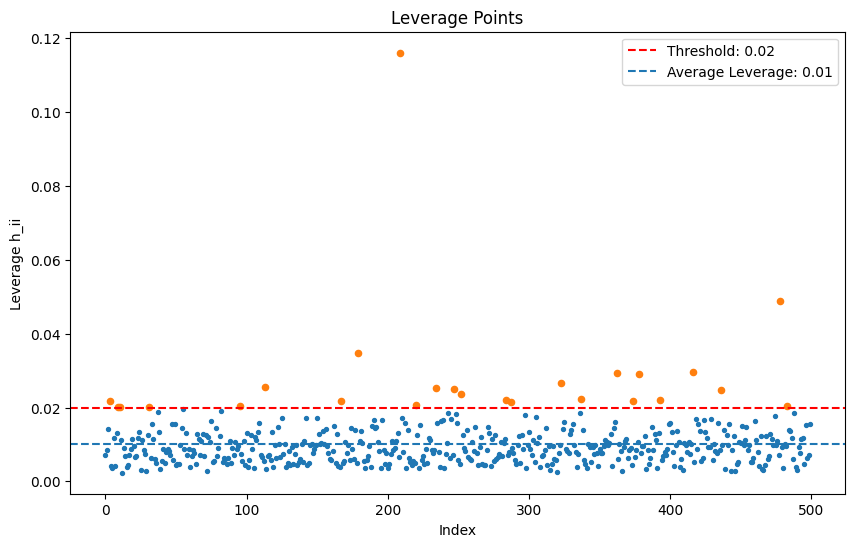

In [12]:

# Plotting leverage points
plt.figure(figsize=(10,6))
plt.scatter(summary["index"], summary["leverage"], s=8)
plt.axhline(threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.2f}')
plt.axhline(avg_lev, linestyle='--', label=f'Average Leverage: {avg_lev:.2f}')
hi_idx = summary.index[summary["leverage"] > threshold].tolist()
if len(hi_idx)> 0:
  plt.scatter(hi_idx, summary.loc[hi_idx, "leverage"], s=20)
plt.title("Leverage Points")
plt.xlabel("Index")
plt.ylabel("Leverage h_ii")
plt.legend()
plt.show()

In [13]:

# Leverage Points
import statsmodels.api as sm

In [14]:
# Generate syntetic data
np.random.seed(0)

# Normal house
house_size = np.random.normal(2000, 400, 100)
house_price = 100 + 0.5 * house_size  + np.random.normal(0, 20000, 100)

# Add few mansion
house_size = np.append(house_size, [5000, 6000, 7000])
house_price = np.append(house_price, [450000, 550000, 800000])

# Fit a linear regression model
X = sm.add_constant(house_size)
model = sm.OLS(house_price, X).fit()

In [15]:

# Print model parameter
print("Model with mansions:")
print(f"Intercept: {model.params[0]:.2f}")
print(f"Slope: {model.params[1]:.2f}")


Model with mansions:
Intercept: -225040.03
Slope: 114.59


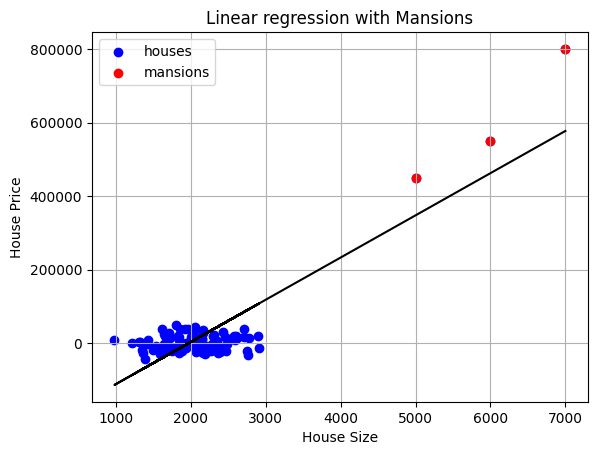

In [16]:
# Plot the data
plt.scatter(house_size, house_price, label='houses', color="blue")
plt.scatter(house_size[-3:], house_price[-3:], label='mansions', color="red")
plt.plot(house_size, model.params[0] + model.params[1]*house_size, color='black')

plt.title('Linear regression with Mansions')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Get the leverage points
influence = model.get_influence()
leverage = influence.hat_matrix_diag
residuals = model.resid

# Threshold
n = len(house_size)
p = X.shape[1]
avg_len = p/n
threshold = 2 * avg_len
print(threshold)


0.038834951456310676


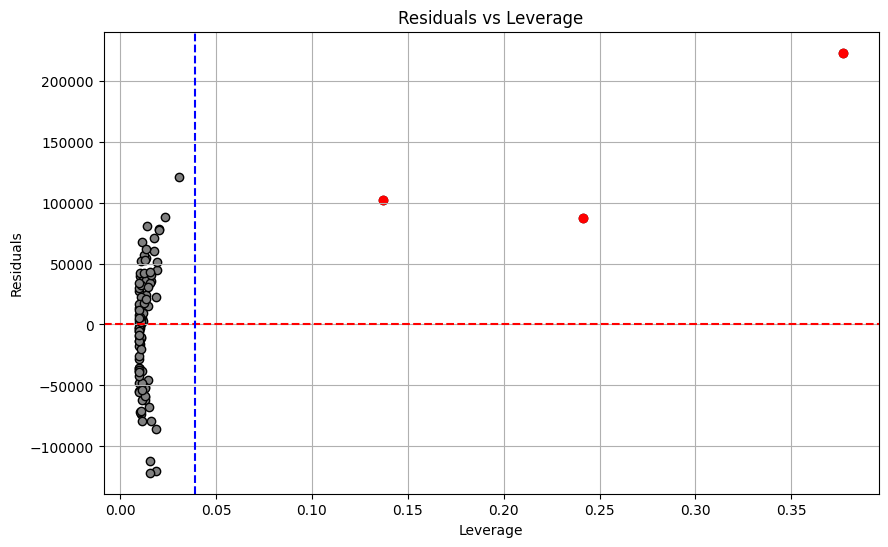

In [18]:

plt.figure(figsize=(10,6))
plt.scatter(leverage, residuals, edgecolors='k', facecolor='gray')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(threshold, color='blue', linestyle='--')
plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.title('Residuals vs Leverage')
plt.grid(True)

high_leverage_points = np.where(leverage > threshold)[0]
plt.scatter(leverage[high_leverage_points], residuals[high_leverage_points], color='red', label='High Leverage Points')
plt.show()

In [19]:

print(f"High Leverage Points (index): {high_leverage_points}")
print(f"Leverage values: {leverage[high_leverage_points]}")

High Leverage Points (index): [100 101 102]
Leverage values: [0.13694378 0.24146323 0.37708716]


In [20]:

from tensorflow.keras.datasets import boston_housing

# Data
(train_X, train_y), (test_X, test_y) = boston_housing.load_data()

# Create Dataframe
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
df_boston = pd.DataFrame(train_X, columns=columns)
df_boston["MEDV"] = train_y

df_boston.head()



57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [21]:

# Display information about the boston housing dataset
print(df_boston.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB
None


In [22]:

# Check that there are no null values
df_boston.isnull().sum()


,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [23]:
# Define dependent and independet variable
X = df_boston.drop('MEDV', axis=1)
y = df_boston['MEDV']

In [24]:

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit a linear regression model
model_boston = sm.OLS(y, X_const).fit()

In [25]:
# Get the leverage points
influence_boston = model_boston.get_influence()
leverage_boston = influence_boston.hat_matrix_diag
residuals_boston = model_boston.resid

# Threshold
n = X_const.shape[0]
p = X_const.shape[1]
avg_len = p/n
threshold = 2 * avg_len
print(threshold)


0.06930693069306931


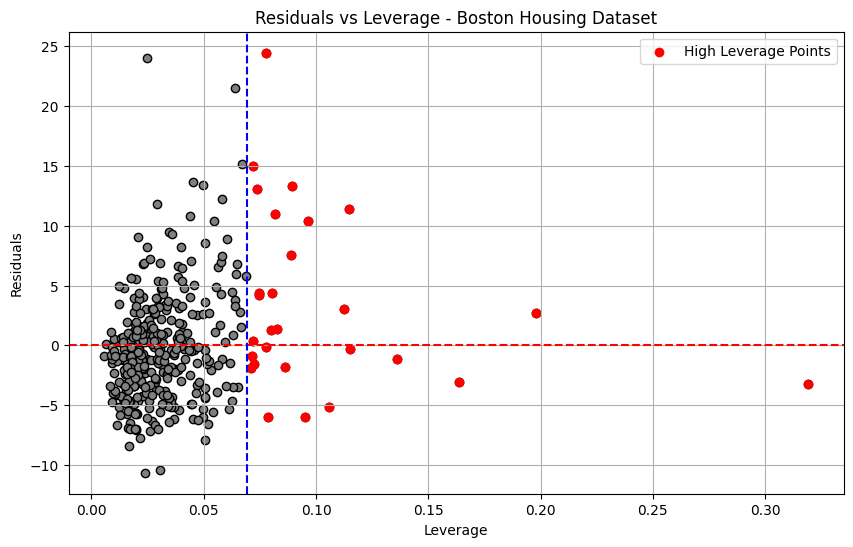

In [26]:

# Make sure both are numpy arrays
residuals_vals = residuals_boston.to_numpy()
leverage_vals = leverage_boston

plt.figure(figsize=(10,6))
plt.scatter(leverage_vals, residuals_vals, edgecolors='k', facecolor='gray')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(threshold, color='blue', linestyle='--')

plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.title('Residuals vs Leverage - Boston Housing Dataset')
plt.grid(True)

# Highlight points with high leverage
high_leverage_points = np.where(leverage_vals > threshold)[0]
plt.scatter(leverage_vals[high_leverage_points], residuals_vals[high_leverage_points],
            color='red', label='High Leverage Points')
plt.legend()
plt.show()


In [27]:

print(f"High Leverage Points (index) - Boston Housing: {high_leverage_points}")
print(f"\nLeverage values - Boston Housing: {leverage_boston[high_leverage_points]}")

High Leverage Points (index) - Boston Housing: [  2  14  15  16  40  55  60  79 104 119 124 135 139 158 169 173 229 236
 240 255 270 294 301 344 349 354 373 395]

Leverage values - Boston Housing: [0.07762793 0.08251974 0.1979954  0.07387445 0.11260653 0.07208095
 0.07125381 0.08628353 0.1362423  0.07447776 0.31918804 0.07248294
 0.16362957 0.09663493 0.11500913 0.07450744 0.11456409 0.07775335
 0.09509937 0.07876584 0.10565841 0.07152512 0.08016497 0.08874128
 0.08020702 0.07200674 0.08910998 0.08182306]


In [28]:

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [29]:

# x, y, z represent the physical dimensions of the diamond in millimeters, we will check if any value in them is 0 and therefore eliminate it
(diamonds[['x', 'y', 'z']] == 0).sum()

,0
x,8
y,7
z,20


In [30]:

# Eliminate the 0
diamonds = diamonds[(diamonds[['x','y','z']] != 0).all(axis=1)]
(diamonds[['x', 'y', 'z']] == 0).sum()


,0
x,0
y,0
z,0


In [31]:
# Convert categorical variables to numeric
diamonds_dummies = pd.get_dummies(diamonds, drop_first=True)

# Check that there are no null values
diamonds_dummies.isnull().sum()

,0
carat,0
depth,0
table,0
price,0
x,0
y,0
z,0
cut_Premium,0
cut_Very Good,0
cut_Good,0


In [32]:
# Define dependent and independet variable
X = diamonds_dummies.drop('price', axis=1)
y = diamonds_dummies['price']

In [33]:

X_const = sm.add_constant(X)
# Convert all columns to float
X_const = X_const.astype(float)
y = y.astype(float)

# Fit a linear regression model
model_diamonds = sm.OLS(y, X_const).fit()

In [34]:

# Get the leverage points
influence_diamonds = model_diamonds.get_influence()
leverage_diamonds = influence_diamonds.hat_matrix_diag
residuals_diamonds = model_diamonds.resid
#residuals_diamonds = influence_diamonds.resid_studentized_internal

# Threshold
n = X_const.shape[0]
p = X_const.shape[1]
avg_len = p/n
threshold = 2 * avg_len
print(threshold)


0.0008902077151335311


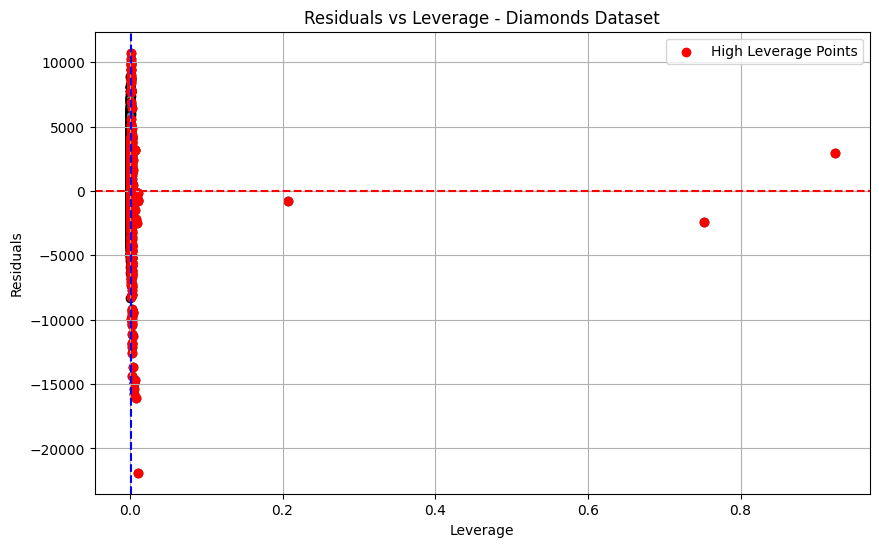

In [35]:

# Make sure both are numpy arrays
residuals_vals = residuals_diamonds.to_numpy()
leverage_vals = leverage_diamonds

plt.figure(figsize=(10,6))
plt.scatter(leverage_vals, residuals_vals, edgecolors='k', facecolor='gray')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(threshold, color='blue', linestyle='--')

plt.xlabel('Leverage')
plt.ylabel('Residuals')
plt.title('Residuals vs Leverage - Diamonds Dataset')
plt.grid(True)

# Highlight points with high leverage
high_leverage_points = np.where(leverage_vals > threshold)[0]
plt.scatter(leverage_vals[high_leverage_points], residuals_vals[high_leverage_points],
            color='red', label='High Leverage Points')
plt.legend()
plt.show()

In [36]:

print(f"High Leverage Points (index) - Diamonds: {high_leverage_points}")
print(f"\nLeverage values - Diamonds: {leverage_diamonds[high_leverage_points]}")

High Leverage Points (index) - Diamonds: [    2     8    15 ... 53855 53862 53877]

Leverage values - Diamonds: [0.0009272  0.00098328 0.00165075 ... 0.00173613 0.0009641  0.00188759]
